In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
from scipy import stats as ss

In [2]:
df = pd.read_csv('autos_after_cleaning.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3t�rer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21


### 1. The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?


Here are several techniques to reduce the memory usage of a dataset:

1. Choose Appropriate Data Types:

   - Use more memory-efficient data types (e.g., using int32 instead of int64, float32 instead of float64) for numerical columns to store data efficiently.

2. Downcast Numeric Columns:

   - Downcast numeric columns using Pandas to reduce memory usage.
   - df = df.apply(pd.to_numeric, downcast='integer')

3. Convert Categorical Data:

   - Convert categorical variables to the Pandas category data type, which can      significantly reduce memory usage.
   - df['category_column'] = df['category_column'].astype('category')

4. Remove Unnecessary Columns:

   - Drop columns that are not necessary for analysis to reduce the overall          memory footprint.

5. Use File Compression Formats:

   - Use more memory-efficient file formats such as Parquet, Feather, or HDF5,      which can store data more efficiently compared to CSV or Excel files.

6. Load Data in Chunks:

   - Process data in chunks using Pandas' chunksize parameter while reading          large datasets to reduce memory usage.

7. Use External Libraries:

   - Libraries like Dask can handle larger-than-memory datasets by performing        operations on smaller chunks of data.

8. Optimize Text Data:

   - Optimize text data by removing unnecessary characters or using                  tokenization, especially for free-text fields.

9. Use Sparse Data Structures:

   - For datasets with lots of zeros, consider using sparse data structures to      save memory.

10. Clean Data and Remove Duplicates:

    - Cleaning data can eliminate unnecessary or duplicate records, reducing         overall memory usage.

-- Write the reduced-memory DataFrame to a new file

df.to_parquet('reduced_memory_data.parquet')

### 2. What is the Average price of vehicle by fuel type and gearbox type.Give a plot.

In [4]:
avg_price_fuel_gearbox = df.groupby(["fuelType","gearbox"])[["price"]].mean()

In [5]:
avg_price_fuel_gearbox = avg_price_fuel_gearbox.reset_index()

In [6]:
avg_price_fuel_gearbox

,fuelType,gearbox,price
0,Andere,Automatik,3127.185185
1,Andere,Manuell,2543.164062
2,Benzin,Automatik,11512.902986
3,Benzin,Manuell,9799.083665
4,Cng,Automatik,6631.000000
5,Cng,Manuell,4461.487572
6,Diesel,Automatik,20971.145118
7,Diesel,Manuell,8650.747973
8,Elektro,Automatik,11522.909091
9,Elektro,Manuell,3944.888889


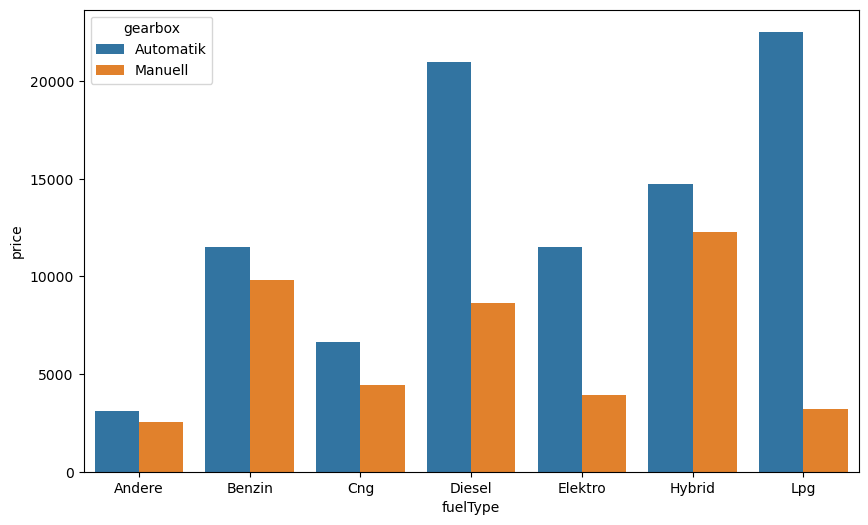

In [7]:
plt.figure(figsize = (10, 6))
sns.barplot(data = avg_price_fuel_gearbox , x = "fuelType", y = "price", hue = "gearbox")
plt.show()

### 3. What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot.

In [8]:
avg_power_vehicletype_gearbox = df.groupby(["fuelType","gearbox"])[["powerPS"]].mean()

In [9]:
avg_power_vehicletype_gearbox = avg_power_vehicletype_gearbox.reset_index()

In [10]:
avg_power_vehicletype_gearbox

,fuelType,gearbox,powerPS
0,Andere,Automatik,152.333333
1,Andere,Manuell,42.562500
2,Benzin,Automatik,162.210633
3,Benzin,Manuell,95.955467
4,Cng,Automatik,120.878049
5,Cng,Manuell,96.892925
6,Diesel,Automatik,171.911190
7,Diesel,Manuell,115.770685
8,Elektro,Automatik,56.800000
9,Elektro,Manuell,126.611111


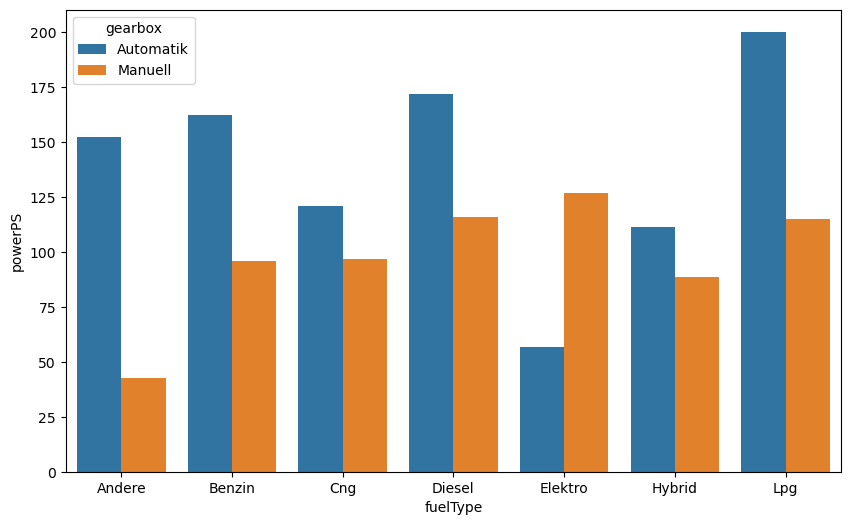

In [11]:
plt.figure(figsize = (10, 6))
sns.barplot(data = avg_power_vehicletype_gearbox, x = "fuelType", y = "powerPS", hue = "gearbox")
plt.show()

### 4. What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this.

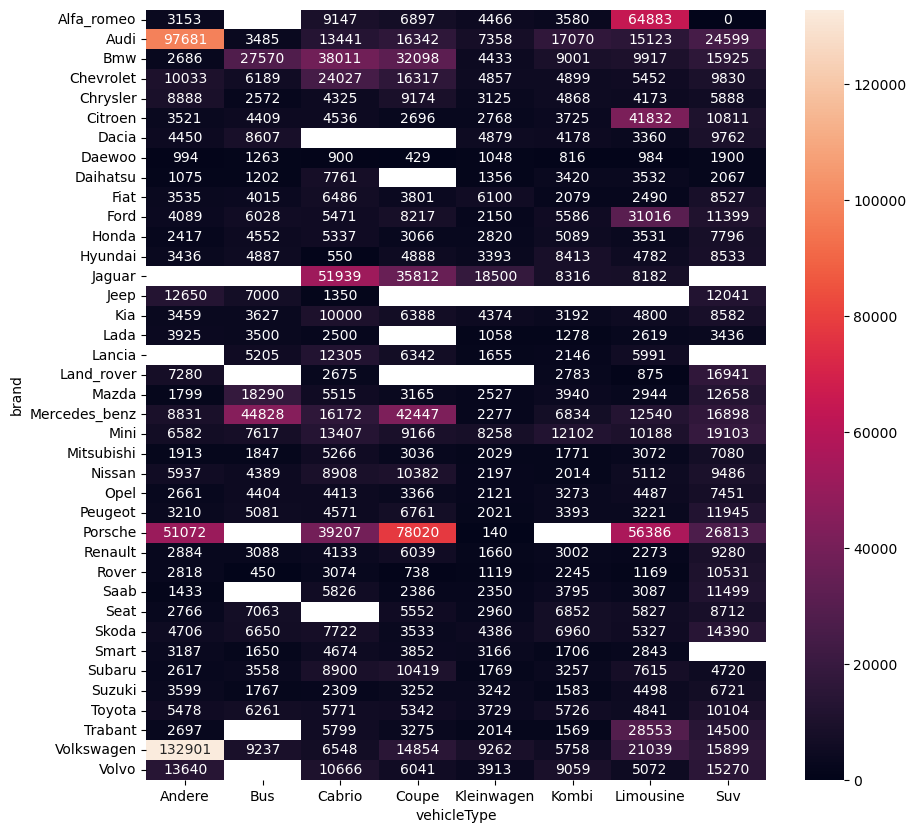

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df['brand'], df['vehicleType'], values=df['price'], aggfunc='mean'), annot=True, fmt='.0f')
plt.show()